### brach1尝试按日期聚合求平均数，看节日是否影响

In [16]:
import pandas as pd 
t3 = pd.read_csv('E:\Competetion\KDD-cup-2017\KDD_OFFICIAL_DATA\dataSets\\training\links (table 3).csv')
t4 = pd.read_csv('E:\Competetion\KDD-cup-2017\KDD_OFFICIAL_DATA\dataSets\\training\\routes (table 4).csv')
t5_train = pd.read_csv('E:\Competetion\KDD-cup-2017\KDD_OFFICIAL_DATA\dataSets\\training\\trajectories(table 5)_training.csv')
t6_train = pd.read_csv("E:\Competetion\KDD-cup-2017\KDD_OFFICIAL_DATA\dataSets\\training\\volume(table 6)_training.csv")

In [17]:
t6_test_2h_ago = pd.read_csv("E:\Competetion\KDD-cup-2017\KDD_OFFICIAL_DATA\dataSets\\testing_phase1\\volume(table 6)_test1.csv")
t5_test_2h_ago = pd.read_csv("E:\Competetion\KDD-cup-2017\KDD_OFFICIAL_DATA\dataSets\\testing_phase1\\trajectories(table 5)_test1.csv")

In [18]:
from copy import copy
t5_train_day = copy(t5_train)
t5_train_day['starting_time'] = pd.to_datetime(t5_train_day['starting_time'], format='%Y-%m-%d %H:%M:%S')

In [19]:
t5_train_day = t5_train_day.set_index(['starting_time'])
t5_train_day = t5_train_day.groupby([pd.TimeGrouper('D'), 'intersection_id', 'tollgate_id']).travel_time.mean()\
       .reset_index().rename(columns = {'travel_time':'avg_travel_time'})

In [20]:
t5_train_day = t5_train_day.set_index(['starting_time'])

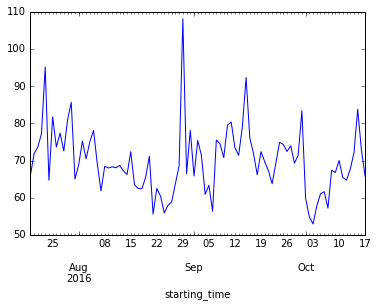

In [21]:
%matplotlib inline
t5_train_day[(t5_train_day['intersection_id']=='A') & (t5_train_day['tollgate_id']==2)]['avg_travel_time'].plot()

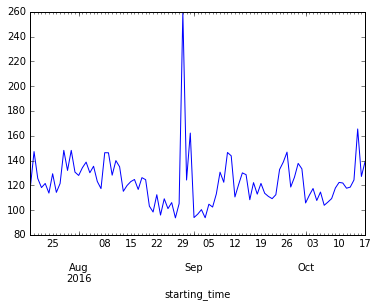

In [22]:
t5_train_day[(t5_train_day['intersection_id']=='A') & (t5_train_day['tollgate_id']==3)]['avg_travel_time'].plot()